In [ ]:
%pip install numpy
%pip install opencv-python
%pip install matplotlib

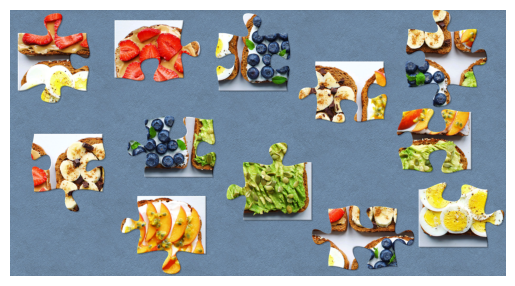

In [141]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import statistics



path = 'puzzles/sandwiches.png'

img_color = cv2.imread(path,1)
img_color = cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB)

plt.axis("off")
plt.imshow(img_color)
plt.show()

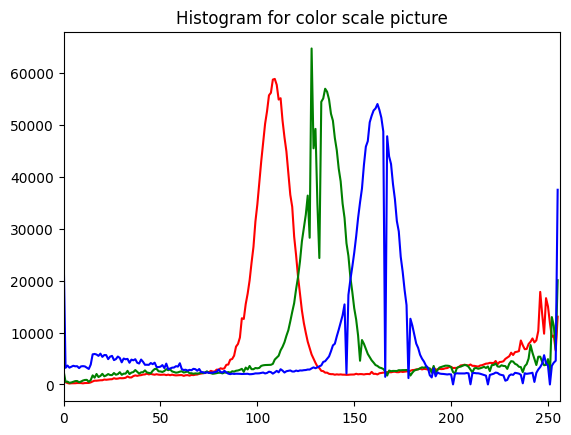

In [142]:
max = [0,0,0]
std = [0,0,0]
color_img_array = np.array(img_color)
color = [color_img_array[:,:,0].flatten(), color_img_array[:,:,1].flatten(), color_img_array[:,:,2].flatten()]
c = ('r','g','b')
for i, col in enumerate(color):
    histr, _ = np.histogram(col, bins=256, range=[0, 256])
    max[i] = histr.argmax()
    std[i] = np.std(col.flatten(), axis = 0)
    # stddev[i] = statistics.stdev(histr)
    # max[i] = histr.index(histr.max())
    plt.plot(histr, color=c[i])
    plt.xlim([0,256])
plt.title('Histogram for color scale picture')
plt.show()

In [143]:
print(max)
print(std)

[109, 128, 162]
[54.73267315782746, 46.63849884075489, 57.10499493684852]


In [144]:
img_copy = np.copy(img_color)
img_copy.astype(int)
stddev = [int(x*0.75) for x in std]
for i in range(img_copy.shape[0]):
    for j in range(img_copy.shape[1]):
        changed = False
        if max[0] - stddev[0] < img_copy[i][j][0] and img_copy[i][j][0] <  max[0]+stddev[0]:
            if max[1] - stddev[1] < img_copy[i][j][1] and img_copy[i][j][1] <  max[1]+stddev[1]:
                if max[2] - stddev[2] < img_copy[i][j][2] and img_copy[i][j][2] <  max[2]+stddev[2]:
                    img_copy[i][j] = [0,0,0]
                    changed = True
        if not changed:
            img_copy[i][j] = [255, 255, 255]
        

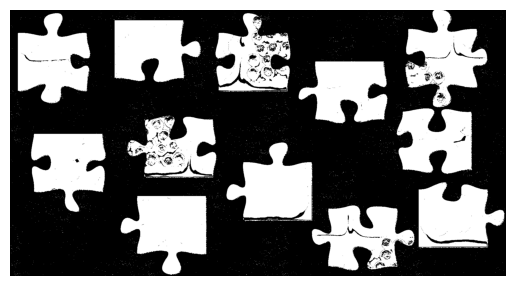

In [145]:
plt.axis("off")
plt.imshow(img_copy)
plt.show()